In [18]:
%pylab inline
import fitting

def mysavefig(filename):
    plt.tight_layout()
    plt.savefig("../images/chap0/"+filename, bbox_inches="tight", dpi=200)
    return

Populating the interactive namespace from numpy and matplotlib


## Comment estimer la puissance d'une bombe atomique à partir d'une photo ?

https://scienceetonnante.com/2014/01/27/comment-estimer-la-puissance-dune-bombe-atomique-a-partir-dune-photo/

The formation of a blast wave by a very intense explosion. I. Theoretical discussion, G. Taylor

The formation of a blast wave by a very intense explosion. II. The atomic explosion of 1945, G. Taylor

alpha = 570.5924913814566
E = 75603216836951.69 J
E = 18000.765913559924 tonnes de TNT


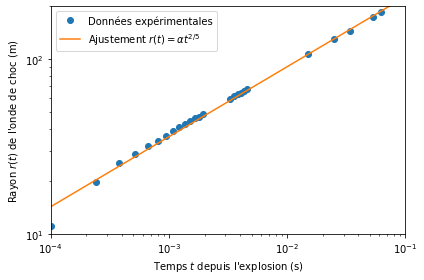

In [37]:
from fitting import fitting

t1 = [0.10, 0.24, 0.38, 0.52, 0.66, 0.80, 0.94]
t2 = [1.08, 1.22, 1.36, 1.50, 1.65, 1.79, 1.93]
t3 = [3.26, 3.53, 3.80, 4.07, 4.34, 4.61]
t4 = [15.0, 25.0, 34.0, 53.0, 62.0]
t = np.array(t1 + t2 + t3 + t4) * 1e-3 # temps écoulé depuis l'explosion en secondes

r1 = [11.1, 19.9, 25.4, 28.8, 31.9, 34.2, 36.3]
r2 = [38.9, 41.0, 42.8, 44.4, 46.0, 46.9, 48.7]
r3 = [59.0, 61.1, 62.9, 64.3, 65.6, 67.3]
r4 = [106.5, 130.0, 145.0, 175.0, 185.0]
r = np.array(r1 + r2 + r3 + r4) # rayon de l'onde de choc en mètres

fitter = fitting.Fit("taylor_nuclearblast", x=t, y=r)
fit_params, ufit_params = fitter.fit(manualguess_params=None, verbosemode=False)
x = np.logspace(-5,0, 101)
yfit = fitter.func(x, *fit_params)

alpha = fit_params[0]
rho = 1.25
E = rho * alpha ** 5
print("alpha = {}".format(alpha))
print("E = {} J".format(E))
print("E = {} tonnes de TNT".format(E/4.2e9))

plt.figure(figsize=(6,4))

plt.loglog(t, r, "o", label="Données expérimentales")
plt.plot(x, yfit, label=r"Ajustement $r(t) = \alpha t^{2/5}$")

plt.xlim(0.0001, 0.1)
plt.ylim(10,200)
plt.xlabel("Temps $t$ depuis l'explosion (s)")
plt.ylabel("Rayon $r(t)$ de l'onde de choc (m)")
plt.legend(loc="upper left")

mysavefig("taylor_nuclearblast.png")